## Decision Tree Regressor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_diabetes

In [6]:
dataset= load_diabetes()

In [10]:
dataset.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [12]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [13]:
df= pd.DataFrame(dataset.data, columns= ['age','sex','bmi','bp', 's1' ,'s2' ,'s3' ,'s4', 's5' ,'s6'])

In [14]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [20]:
X= df

In [17]:
y=dataset['target']

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state=10)

In [22]:
X_train.shape,y_train.shape

((309, 10), (309,))

In [23]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

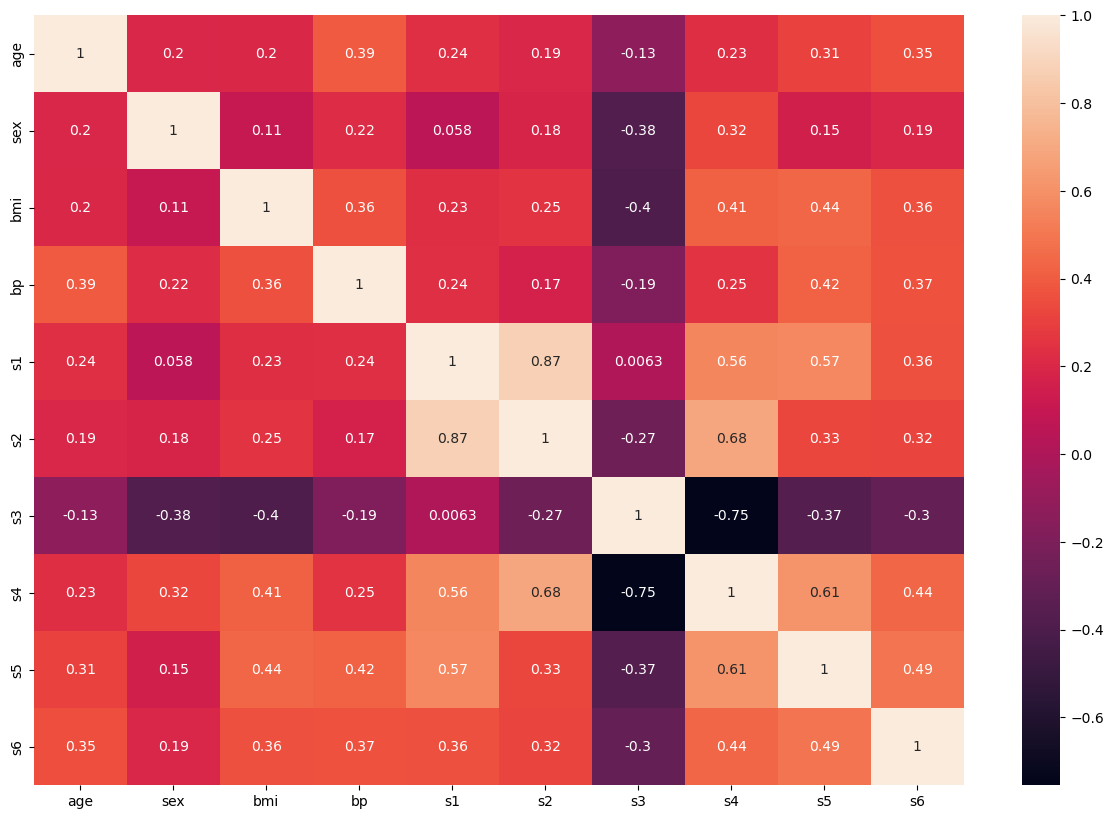

In [28]:
plt.figure(figsize= (15,10))
sns.heatmap(X_train.corr(), annot= True)

In [32]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [29]:
param= {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] ,
    'splitter' : ['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto', 'sqrt', 'log2']}

In [30]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [33]:
regressor = DecisionTreeRegressor()

In [39]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(regressor,param_grid = param,cv= 5,scoring = 'neg_mean_absolute_error' )

In [41]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [42]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'random'}

In [43]:
grid.best_score_

-49.82413151212487

In [44]:
y_pred = grid.predict(X_test)

In [45]:
from sklearn.metrics import *

mean_absolute_error(y_test,y_pred)

51.03654672395274

In [46]:
r2_score(y_test,y_pred)

0.3559655358209384

In [47]:
mean_squared_error(y_test,y_pred)

4075.238263189504

In [48]:
selected_model = DecisionTreeRegressor(criterion= 'squared_error',
 max_depth= 4,
 max_features= 'auto',
splitter= 'random')

In [49]:
selected_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features='auto', splitter='random')

In [50]:
y_pred= selected_model.predict(X_test)

In [51]:
mean_absolute_error(y_test,y_pred)

48.70821681279894

In [52]:
r2_score(y_test,y_pred)

0.4364098740910699

[Text(0.5, 0.9, 'x[8] <= 0.008\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[3] <= 0.007\nsquared_error = 3609.845\nsamples = 175\nvalue = 118.371'),
 Text(0.125, 0.5, 'x[7] <= -0.022\nsquared_error = 2244.128\nsamples = 129\nvalue = 108.109'),
 Text(0.0625, 0.3, 'x[2] <= -0.055\nsquared_error = 2005.806\nsamples = 82\nvalue = 100.268'),
 Text(0.03125, 0.1, 'squared_error = 942.521\nsamples = 24\nvalue = 78.75'),
 Text(0.09375, 0.1, 'squared_error = 2174.901\nsamples = 58\nvalue = 109.172'),
 Text(0.1875, 0.3, 'x[1] <= -0.038\nsquared_error = 2365.572\nsamples = 47\nvalue = 121.787'),
 Text(0.15625, 0.1, 'squared_error = 2644.975\nsamples = 23\nvalue = 137.739'),
 Text(0.21875, 0.1, 'squared_error = 1620.25\nsamples = 24\nvalue = 106.5'),
 Text(0.375, 0.5, 'x[2] <= 0.018\nsquared_error = 6316.086\nsamples = 46\nvalue = 147.152'),
 Text(0.3125, 0.3, 'x[8] <= -0.006\nsquared_error = 4101.621\nsamples = 32\nvalue = 124.438'),
 Text(0.28125, 0.1, 'squared

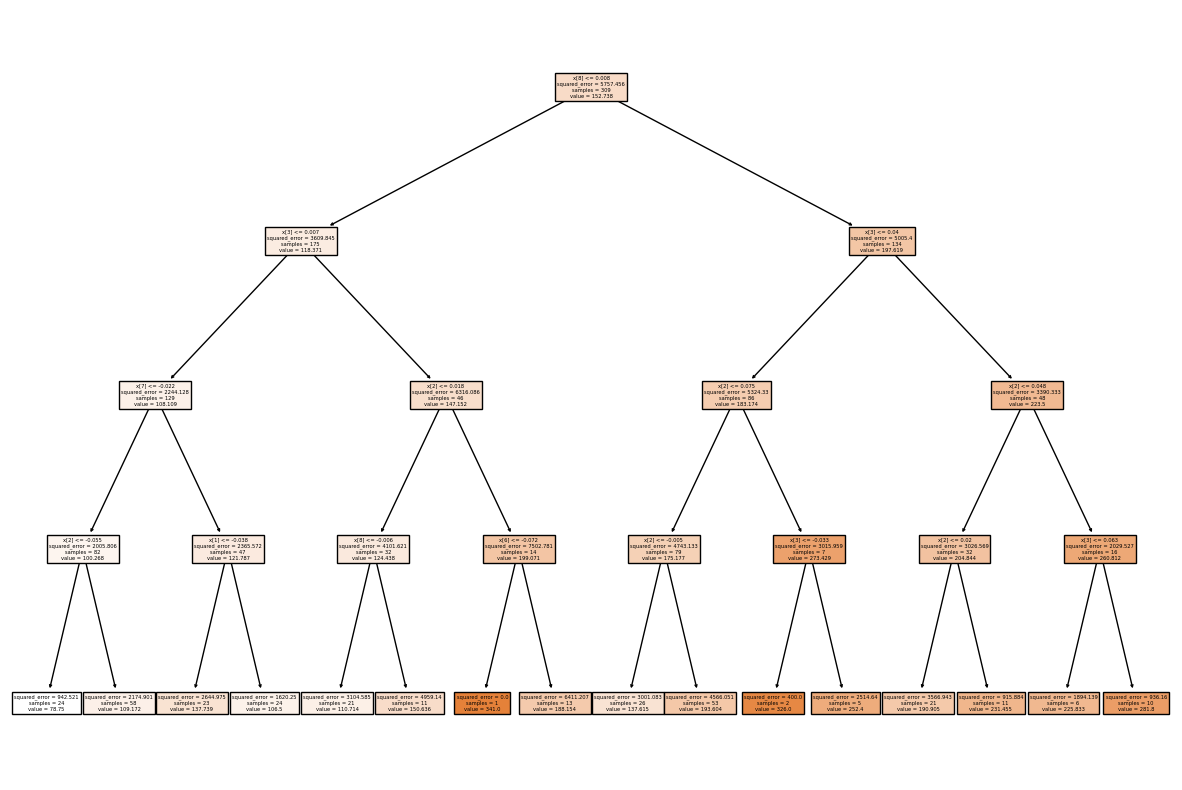

In [53]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selected_model,filled=True)